In [1]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

from pathlib import Path

image = 'coral'
size  = 1800

experiment = 'quant_mdct'

output = Path('outputs') / image

output.mkdir(exist_ok=True, parents=True)

Text(0.5, 1.0, 'Original image in graymap')

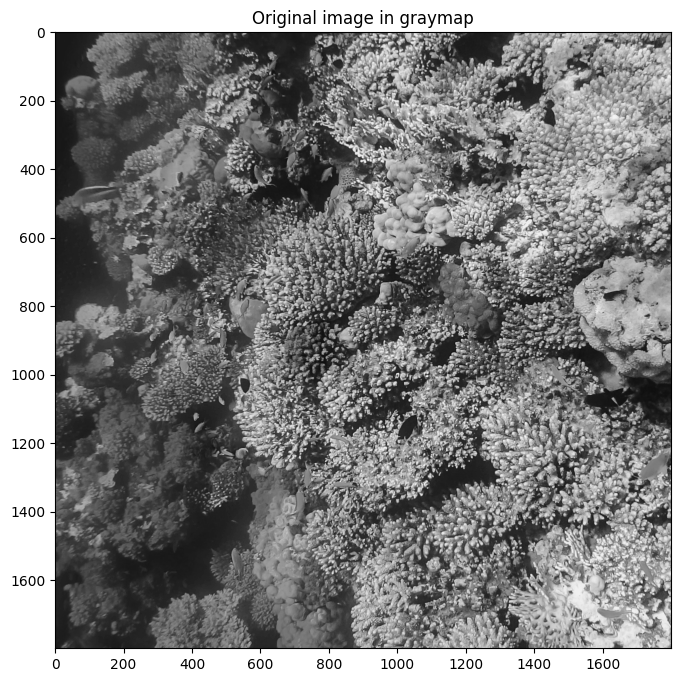

In [2]:
y, cb, cr = Image.open(f'../../images/{image}/{image}-{size}.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

Text(0.5, 1.0, 'Kaiser-Bessel derived window')

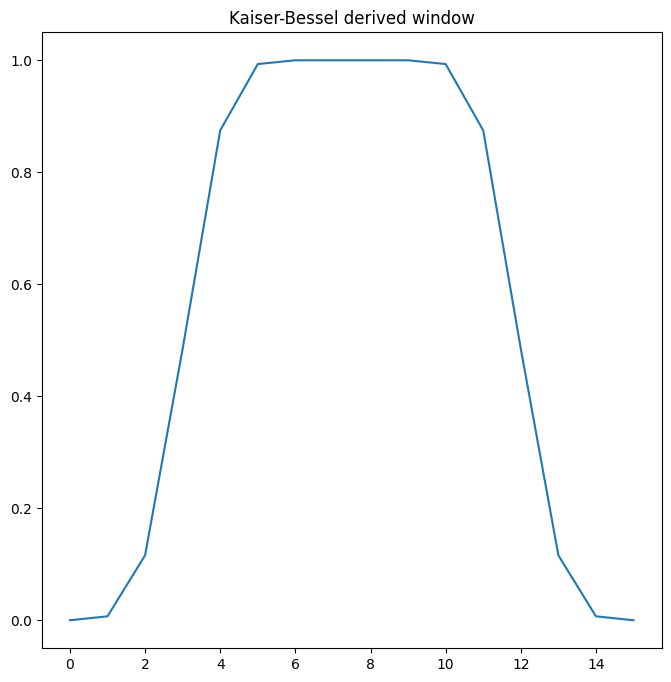

In [3]:
dct = np.zeros_like(im, dtype=np.float64)

im -= 128

from scipy.signal.windows import kaiser_bessel_derived as kbd

N=16

dct_type = 4
dct_norm = 'ortho'
wfltr = kbd(N, 28) # upto 709

plt.figure()
plt.plot(wfltr)
plt.title("Kaiser-Bessel derived window")



In [4]:
for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N, wfltr, type=dct_type, norm=dct_norm)

In [5]:
im_rec = np.zeros_like(im)

for i in range(im.shape[0]):
    im_rec[i] = imdct(dct[i], N, wfltr, type=dct_type, norm=dct_norm)

im_rec += 128

Text(0.5, 1.0, 'Recovered image')

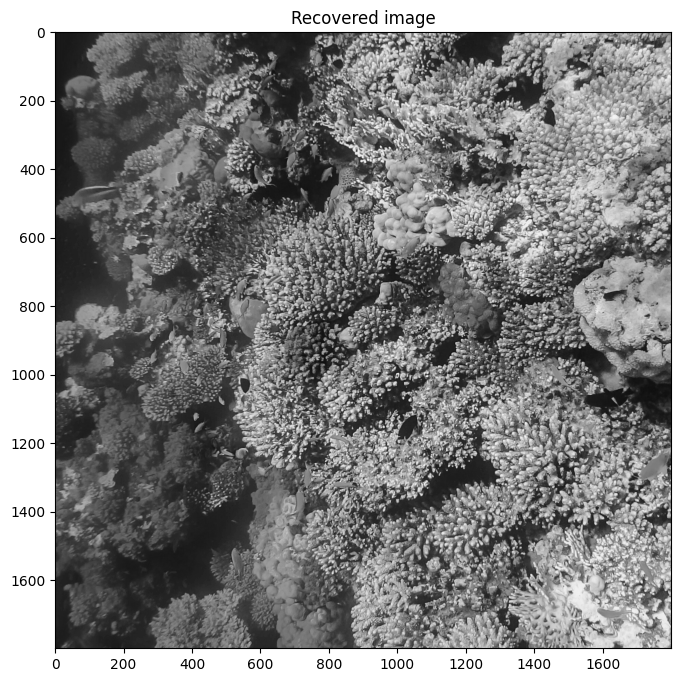

In [6]:
plt.figure()
plt.imshow(im_rec, cmap='gray')
plt.title("Recovered image")

In [7]:
# plt.imsave('mdct_orig_comparision.png', np.hstack([im, im_rec]), cmap='grey')
plt.imsave(f'{output}/mdct_orig_comparision.png', np.hstack((im, im_rec)), cmap='gray')

In [8]:
plt.imsave(f'{output}/mdct_rec.png', im_rec, cmap='gray')

In [9]:
np.allclose(im, im_rec)

False